### Applying Binary Classification over perceptron
**Loading the dataset**

In [59]:
import pandas as pd

train = pd.read_csv("a4a.txt",delimiter=" ",header = None)
test = pd.read_csv("a4at.txt",delimiter=" ",header = None)

X_train = train.iloc[:,1:15].values
y_train = train.iloc[:,0].values
X_test = test.iloc[:,1:15].values
y_test = test.iloc[:,0].values

**Perceptron class**

In [60]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1):
        self.learning_rate = learning_rate
        self._b = 0.0  # y-intercept
        self._w = None  # weights assigned to input features
        # count of errors during each iteration
        self.misclassified_samples = []

    def fit(self, x: np.array, y: np.array, n_iter=10):
        self._b = 0.0
        self._w = np.zeros(x.shape[1])
        self.misclassified_samples = []

        for _ in range(n_iter):
            # counter of the errors during this training iteration
            errors = 0
            for xi, yi in zip(x, y):
                # for each sample compute the update value
                update = self.learning_rate * (yi - self.predict(xi))
                # and apply it to the y-intercept and weights array
                self._b += update
                self._w += update * xi
                errors += int(update != 0.0)

            self.misclassified_samples.append(errors)

    def f(self, x: np.array) -> float:
        return np.dot(x, self._w) + self._b

    def predict(self, x: np.array):
        return np.where(self.f(x) >= 0, 1, -1)

**Function to calculate accuracy and loss**

In [61]:
def calculate_accuracy(y_true,y_pred):
    hit = 0
    miss = 0
    for n,i in enumerate(y_true):
        if i == y_pred[n]:
            hit += 1
        else:
            miss += 1
    score = hit/len(y_true)
    loss = miss/len(y_true)
    return score , loss

**Training the Perceptron**

In [62]:
classifier = Perceptron(learning_rate=0.01)
classifier.fit(X_train, y_train)

**Make the Prediction** 

In [63]:
y_pred = classifier.predict(X_test)

**Calculating the accuracy**

In [64]:
acc,loss = calculate_accuracy(y_test,y_pred)
print("Accuracy: ",round(acc,2))
print("Loss: ", round(loss,2))

Accuracy:  0.76
Loss:  0.24


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

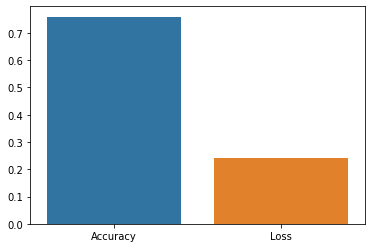

In [66]:
import seaborn as sns
sns.barplot(["Accuracy","Loss"],[acc,loss])

### Multi-Classification using Perceptron

**Class for Multi-Perceptron**

In [43]:
class Multi_Perceptron:
    def __init__(self):
        self.m = [] 
    
    def unique(self,list1):
        unique_list = []
        for x in list1:
            if x not in unique_list:
                unique_list.append(x)
        return unique_list
    
    def fit(self,X_train,y_train):
        classes = self.unique(y_train)
        for c in classes:
            m = Perceptron(learning_rate=0.01)
            y = np.where(y_train == c,1,-1)
            m.fit(X_train,y_train)
            self.m.append(m)
            
    def predict(self,y_test):
        classes = self.unique(y_train)
        predictions = []
        for m in self.m:
            p = m.predict(y_test)   

**Function to randomly shuffle the dataset**

In [44]:
def shuffle_split_data(X, y, split = 0.7):
    split = np.random.rand(X.shape[0]) < split

    X_train = X[split]
    y_train = y[split]
    X_test =  X[~split]
    y_test = y[~split]
    
    return X_train,y_train,X_test,y_test

**Loading the multi classification dataset**

In [56]:
import pandas as pd

df = pd.read_csv("iris.txt",delimiter=" ",header = None)

X = df.iloc[:,1:5].values 
y = df.iloc[:,0].values

X_train,y_train,X_test,y_test = shuffle_split_data(X, y)

**Training that dataset**

In [46]:
multiclassifier = Multi_Perceptron()
multiclassifier.fit(X_train, y_train)

**Getting results by predicting it over test data**

In [ ]:
multiclassifier.predict(X_test)

**Calculating accuracy and loss**

In [ ]:
acc,loss = calculate_accuracy(y_test,y_pred)
print("Accuracy: ",round(acc,2))
print("Loss: ", round(loss,2))